In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import os
from matplotlib.image import imread
import random
import matplotlib.image as mpimg

2023-05-27 05:27:28.220133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
datagen = ImageDataGenerator(rotation_range=10,
            rescale = 1./255,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.1,
            shear_range=0.1,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest',
            validation_split=0.2  # set validation split to 20% 
            )


In [3]:
# Import the data into train and Validation subset
train = datagen.flow_from_directory(directory= r"/Users/tejumadeoyedele/Desktop/dataset2",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'training'
                                            )

test = datagen.flow_from_directory(directory= r"/Users/tejumadeoyedele/Desktop/dataset2",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'validation'
                                            )

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
train.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [6]:
train.num_classes

4

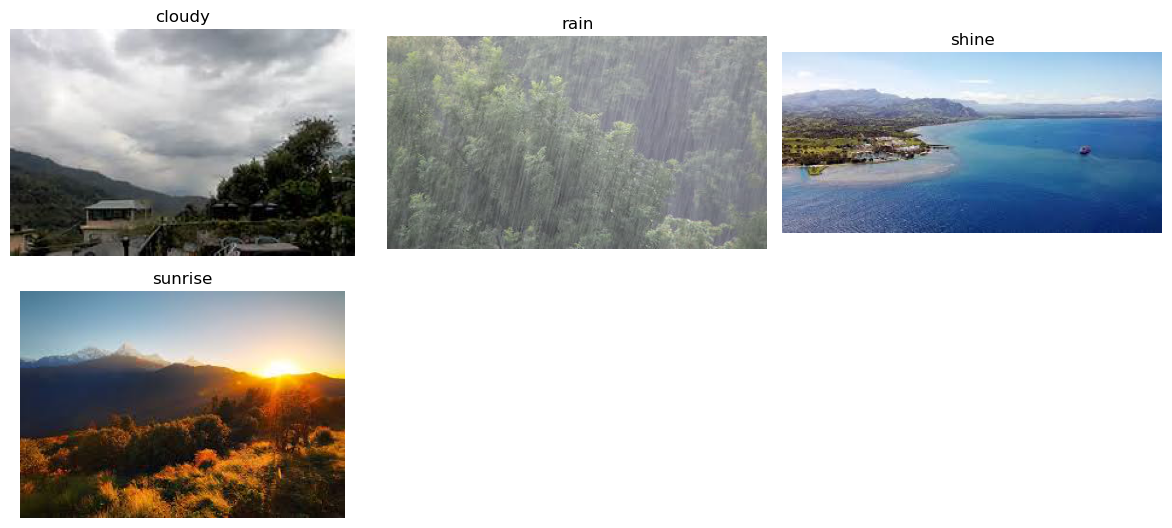

In [7]:
# Print Each sample of all Classes
# Directory path where the images are located
directory_path = '/Users/tejumadeoyedele/Desktop/dataset2'

# List of class names
class_names = ['cloudy', 'rain', 'shine', 'sunrise']

# Create a figure to display the images
fig = plt.figure(figsize=(12, 8))

# Iterate over each class
for i, class_name in enumerate(class_names):
    # Get a list of image files in the class directory
    class_directory = os.path.join(directory_path, class_name)
    image_files = os.listdir(class_directory)

    # Select a random image file from the class
    random_image = random.choice(image_files)
    image_path = os.path.join(class_directory, random_image)

    # Load and display the image
    ax = fig.add_subplot(3, 3, i+1)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


In [9]:
train.image_shape

(64, 64, 3)

In [ ]:
# Build a simple model with 3 hidden layers

In [10]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= train.image_shape))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(train.num_classes, activation = 'softmax'))

In [11]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(train, validation_data = test, batch_size = 32, epochs = 10)

Epoch 1/10
29/29 [==============================] - 6s 195ms/step - loss: 1.1063 - accuracy: 0.6115 - val_loss: 0.6697 - val_accuracy: 0.7634
Epoch 2/10
29/29 [==============================] - 5s 179ms/step - loss: 0.5308 - accuracy: 0.8047 - val_loss: 0.5809 - val_accuracy: 0.8170
Epoch 3/10
29/29 [==============================] - 5s 180ms/step - loss: 0.4393 - accuracy: 0.8413 - val_loss: 0.7098 - val_accuracy: 0.7545
Epoch 4/10
29/29 [==============================] - 5s 173ms/step - loss: 0.4308 - accuracy: 0.8524 - val_loss: 0.5216 - val_accuracy: 0.7991
Epoch 5/10
29/29 [==============================] - 5s 178ms/step - loss: 0.4475 - accuracy: 0.8313 - val_loss: 0.7503 - val_accuracy: 0.7812
Epoch 6/10
29/29 [==============================] - 5s 179ms/step - loss: 0.3620 - accuracy: 0.8790 - val_loss: 0.5801 - val_accuracy: 0.8214
Epoch 7/10
29/29 [==============================] - 5s 181ms/step - loss: 0.3482 - accuracy: 0.8735 - val_loss: 0.6629 - val_accuracy: 0.7812
Epoch 

In [13]:
y_preds = model.predict(test)

7/7 [==============================] - 1s 195ms/step


In [14]:
y_eva = model.evaluate(test)

7/7 [==============================] - 1s 177ms/step - loss: 0.5215 - accuracy: 0.8348


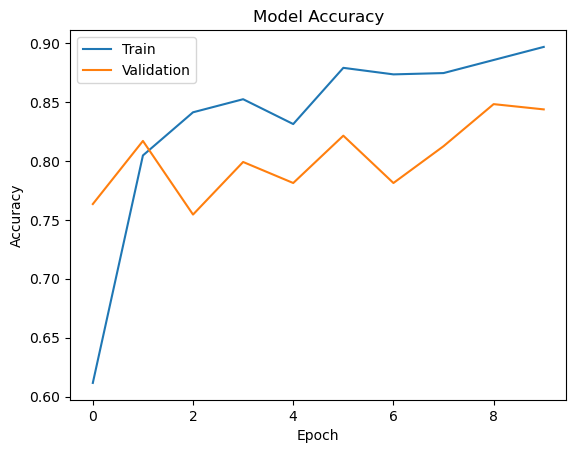

In [15]:
# Let's visualize training and testing accuracy by graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# increase the hidden layer

In [16]:
model2 = Sequential()
model2.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= train.image_shape))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(2,2))
model2.add(tf.keras.layers.Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(train.num_classes, activation = 'softmax'))

In [17]:
model2.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
history = model2.fit(train,validation_data = test, batch_size = 32, epochs = 10)

Epoch 1/10
29/29 [==============================] - 7s 240ms/step - loss: 1.0208 - accuracy: 0.6559 - val_loss: 0.7766 - val_accuracy: 0.7589
Epoch 2/10
29/29 [==============================] - 7s 224ms/step - loss: 0.6107 - accuracy: 0.7858 - val_loss: 0.7322 - val_accuracy: 0.7321
Epoch 3/10
29/29 [==============================] - 7s 227ms/step - loss: 0.5001 - accuracy: 0.8091 - val_loss: 0.7582 - val_accuracy: 0.7768
Epoch 4/10
29/29 [==============================] - 7s 234ms/step - loss: 0.3814 - accuracy: 0.8590 - val_loss: 0.5421 - val_accuracy: 0.8214
Epoch 5/10
29/29 [==============================] - 7s 223ms/step - loss: 0.3432 - accuracy: 0.8801 - val_loss: 0.4253 - val_accuracy: 0.7991
Epoch 6/10
29/29 [==============================] - 7s 225ms/step - loss: 0.3081 - accuracy: 0.8935 - val_loss: 0.3833 - val_accuracy: 0.8482
Epoch 7/10
29/29 [==============================] - 7s 225ms/step - loss: 0.3176 - accuracy: 0.8746 - val_loss: 0.5101 - val_accuracy: 0.8080
Epoch 

In [19]:
y_preds2 = model2.predict(test)

7/7 [==============================] - 2s 213ms/step


In [20]:
y_eva2 = model2.evaluate(test)

7/7 [==============================] - 1s 212ms/step - loss: 0.6090 - accuracy: 0.7857


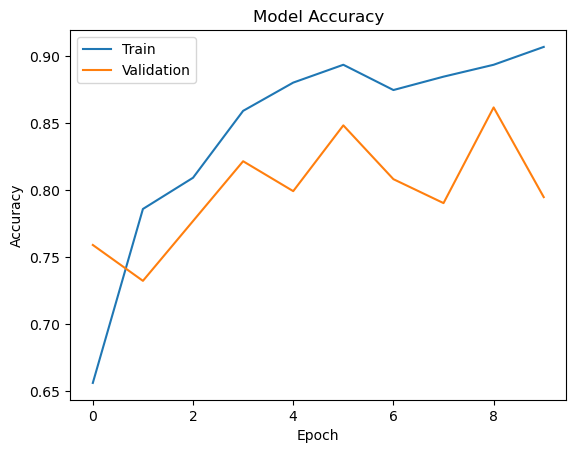

In [21]:
# Let's visualize training and testing accuracy by graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# with more layers overfitting is beginning to set in , as difference accuracy result in train and test
#begin to drift wide apart

In [ ]:
# Model 3 including the dropout method with increase no of epoch 

In [26]:
# Building a CNN Model
model_3 = Sequential()
model_3.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= train.image_shape))
model_3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(2,2))
model_3.add(Dropout(0.25))
model_3.add(tf.keras.layers.Flatten())
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(train.num_classes, activation = 'softmax'))

In [27]:
## Compile the model
model_3.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
history3 = model_3.fit(train,validation_data = test, batch_size = 32, epochs = 20)

Epoch 1/20
29/29 [==============================] - 7s 247ms/step - loss: 1.1948 - accuracy: 0.5782 - val_loss: 0.7118 - val_accuracy: 0.7812
Epoch 2/20
29/29 [==============================] - 7s 222ms/step - loss: 0.5582 - accuracy: 0.7969 - val_loss: 0.6550 - val_accuracy: 0.7857
Epoch 3/20
29/29 [==============================] - 7s 233ms/step - loss: 0.5233 - accuracy: 0.8235 - val_loss: 0.6436 - val_accuracy: 0.8125
Epoch 4/20
29/29 [==============================] - 7s 224ms/step - loss: 0.4394 - accuracy: 0.8324 - val_loss: 0.5809 - val_accuracy: 0.7812
Epoch 5/20
29/29 [==============================] - 6s 223ms/step - loss: 0.3750 - accuracy: 0.8724 - val_loss: 0.5369 - val_accuracy: 0.8125
Epoch 6/20
29/29 [==============================] - 7s 233ms/step - loss: 0.3845 - accuracy: 0.8713 - val_loss: 0.5612 - val_accuracy: 0.7723
Epoch 7/20
29/29 [==============================] - 7s 231ms/step - loss: 0.4238 - accuracy: 0.8502 - val_loss: 0.5786 - val_accuracy: 0.8036
Epoch 

In [29]:
y_preds3 = model_3.predict(test)

7/7 [==============================] - 2s 180ms/step


In [30]:
y_eva3 = model_3.evaluate(test)

7/7 [==============================] - 1s 196ms/step - loss: 0.3329 - accuracy: 0.8705


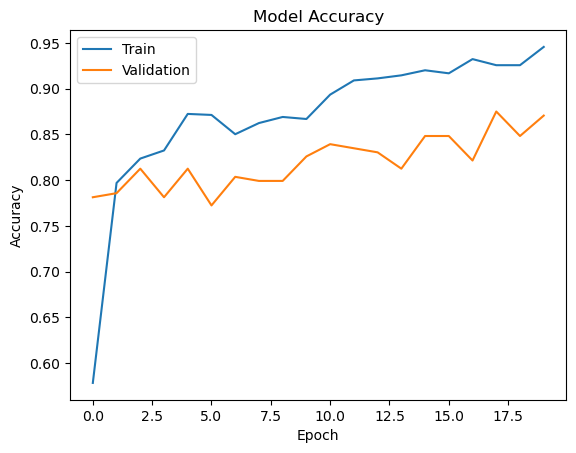

In [31]:
# Let's visualize training and testing accuracy by graph
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# using model 3 to build model 4 to check the effect of batch size on the model, increasing batch size to 128

In [32]:
# Building a CNN Model
model_4 = Sequential()
model_4.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= train.image_shape))
model_4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model_4.add(tf.keras.layers.MaxPool2D(2,2))
model_4.add(Dropout(0.25))
model_4.add(tf.keras.layers.Flatten())
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(train.num_classes, activation = 'softmax'))

In [33]:
## Compile the model
model_4.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [34]:
history4 = model_4.fit(train,validation_data = test, batch_size = 100, epochs = 20)

Epoch 1/20
29/29 [==============================] - 7s 234ms/step - loss: 1.3023 - accuracy: 0.5694 - val_loss: 0.6681 - val_accuracy: 0.7812
Epoch 2/20
29/29 [==============================] - 7s 227ms/step - loss: 0.5506 - accuracy: 0.8002 - val_loss: 0.5358 - val_accuracy: 0.8125
Epoch 3/20
29/29 [==============================] - 7s 225ms/step - loss: 0.4570 - accuracy: 0.8302 - val_loss: 0.5068 - val_accuracy: 0.8259
Epoch 4/20
29/29 [==============================] - 7s 235ms/step - loss: 0.4298 - accuracy: 0.8402 - val_loss: 0.6196 - val_accuracy: 0.7545
Epoch 5/20
29/29 [==============================] - 7s 227ms/step - loss: 0.4339 - accuracy: 0.8368 - val_loss: 0.5638 - val_accuracy: 0.7991
Epoch 6/20
29/29 [==============================] - 7s 230ms/step - loss: 0.3413 - accuracy: 0.8735 - val_loss: 0.5137 - val_accuracy: 0.8170
Epoch 7/20
29/29 [==============================] - 7s 223ms/step - loss: 0.3953 - accuracy: 0.8346 - val_loss: 0.5328 - val_accuracy: 0.8214
Epoch 

In [35]:
y_preds4 = model_4.predict(test)

7/7 [==============================] - 2s 227ms/step


In [36]:
y_eva4 = model_4.evaluate(test)

7/7 [==============================] - 1s 207ms/step - loss: 0.3684 - accuracy: 0.8571


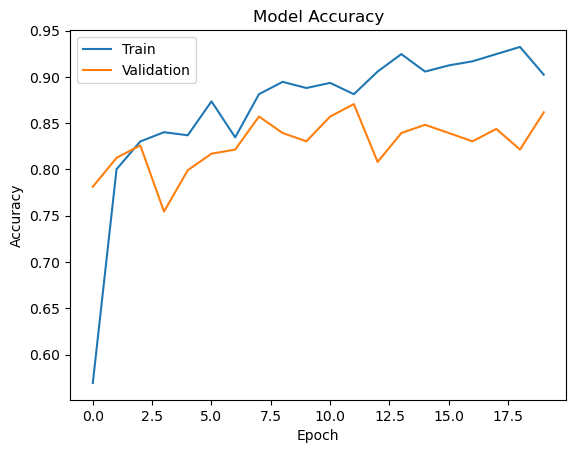

In [37]:
# Let's visualize training and testing accuracy by graph
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# model 5 increasing learning rate form 0.001 to 0.01 to see the effect on the model

In [38]:
model_5 = Sequential()
model_5.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= train.image_shape))
model_5.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model_5.add(tf.keras.layers.MaxPool2D(2,2))
model_5.add(Dropout(0.25))
model_5.add(tf.keras.layers.Flatten())
model_5.add(Dense(128, activation = 'relu'))
model_5.add(Dropout(0.25))
model_5.add(Dense(train.num_classes, activation = 'softmax'))

In [40]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.01)

In [41]:
model_5.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
history5 = model_5.fit(train,validation_data = test, batch_size = 32, epochs = 20)

Epoch 1/20
29/29 [==============================] - 7s 245ms/step - loss: 4.0173 - accuracy: 0.4650 - val_loss: 1.3947 - val_accuracy: 0.5536
Epoch 2/20
29/29 [==============================] - 6s 222ms/step - loss: 0.7522 - accuracy: 0.6948 - val_loss: 0.7402 - val_accuracy: 0.7812
Epoch 3/20
29/29 [==============================] - 7s 232ms/step - loss: 0.6004 - accuracy: 0.7569 - val_loss: 1.0035 - val_accuracy: 0.7411
Epoch 4/20
29/29 [==============================] - 7s 224ms/step - loss: 0.5874 - accuracy: 0.7825 - val_loss: 0.7439 - val_accuracy: 0.6964
Epoch 5/20
29/29 [==============================] - 7s 215ms/step - loss: 0.5550 - accuracy: 0.7747 - val_loss: 0.7340 - val_accuracy: 0.7902
Epoch 6/20
29/29 [==============================] - 7s 228ms/step - loss: 0.5343 - accuracy: 0.8102 - val_loss: 1.0798 - val_accuracy: 0.6384
Epoch 7/20
29/29 [==============================] - 7s 225ms/step - loss: 0.5551 - accuracy: 0.7980 - val_loss: 0.6520 - val_accuracy: 0.7455
Epoch 

In [43]:
y_preds5 = model_5.predict(test)

7/7 [==============================] - 1s 205ms/step


In [44]:
y_eva5 = model_5.evaluate(test)

7/7 [==============================] - 1s 197ms/step - loss: 0.6582 - accuracy: 0.6786


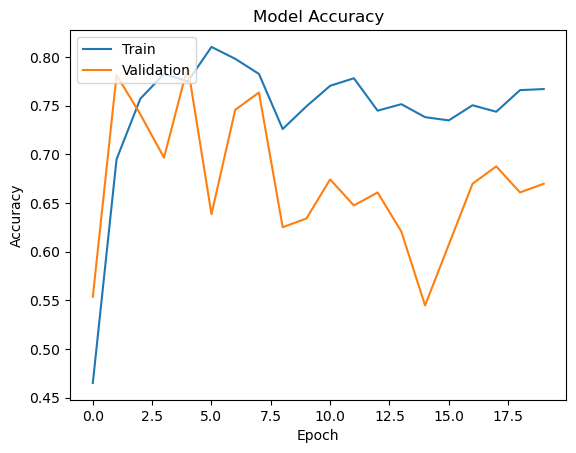

In [45]:
# Let's visualize training and testing accuracy by graph
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# from this model found out a large learning rate negatively affect the result of our model

In [ ]:
# combining and plotting accuracy result on test data for all models

In [49]:
result = [y_eva[1], y_eva2[1], y_eva3[1], y_eva4[1], y_eva5[1]]
model = ['model1','model2','model3','model4','model5']

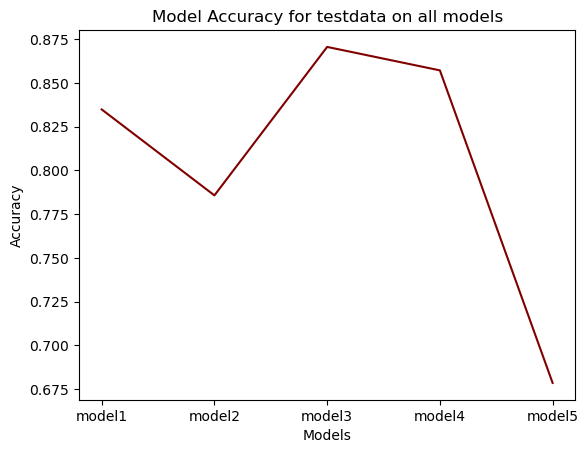

In [53]:
plt.plot( model, result, c= 'maroon')
plt.title('Model Accuracy for testdata on all models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()